### Read the data for the assignment

In [1]:
# import
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

file = "/content/drive/MyDrive/Asssignment4_Data.xlsx"

df = pd.read_excel(file, [0,1])

# get the header of file
#header = df[1].head(0)
features = ["Local Price", "Bathrooms", "Land Area", "Living area", "# Garages", "# Rooms", "# Bedrooms", "Age of home"]
feature_continuous = {"Local Price", "Land Area", "Living area",  "Age of home"}
feature_category = {"Bathrooms", "# Garages", "# Rooms", "# Bedrooms"}

CClass = ["Apartment", "Condo", "House"]

Mounted at /content/drive


In [2]:
#get training and test data
X_Train = np.array(df[0])[:, 1:-1]
Y_Train = np.array(df[0])[:, -1]

X_Test = np.array(df[1])[:, 1:-1]
Y_Test = np.array(df[1])[:, -1]

## Question 1

## 1. the conditional probability distribution for each feature for each class. (The detailed computation is in the report)

###	Conditional probability for apartment class:

mean_price_A = 7.33  
std_price_A = 3.62

mean_landarea_A = 6.1  
std_landarea_A = 3.26

mean_livingarea_A = 1.5  
std_livingarea_A = 0.7

mean_age_A = 38.71  
std_age_A = 14.68

P_bathroom_A =  {1:0.6, 1.5:0.2, 2.5:0.2}

P_garage_A =  {0:2/11, 1:4/11, 1.5:2/11, 2:3/11}

P_room_A =  {5:2/13, 6:3/13, 7: 3/13, 8:2/13, 9:2/13, 10:1/13}

P_bedrom_A =  {2:2/11, 3:4/11, 4:3/11, 5:2/11}

### Conditional probability for condo class

mean_price_C = 7.42   
std_price_C = 4.61

mean_landarea_C = 6.02   
std_landarea_C = 2.54

mean_livingarea_C = 1.55   
std_livingarea_C = 0.92

mean_age_C = 39.67  
std_age_C = 13.96

P_bathroom_A =  {1:5/9, 1.5:2/9, 2.5:2/9} 

P_garage_A =  {0:1/10, 1:5/10, 1.5:1/10, 2:3/10} 

P_room_A =  {5:1/12, 6:5/12, 7: 2/12, 8:1/12, 9:1/12, 10:2/12} 

P_bedrom_A =  {2:1/10, 3:6/10, 4:1/10, 5:2/10}

### Conditional probability for houxe class
mean_price_A = 5.76  
std_price_A = 0.57

mean_landarea_A = 6.63  
std_landarea_A = 2.25

mean_livingarea_A = 1.39  
std_livingarea_A = 0.21

mean_age_A = 34.28  
std_age_A = 12.7

P_bathroom_A =  {1:0.7, 1.5:0.2, 2.5:0.1} 

P_garage_A =  {0:3/11, 1:3/11, 1.5:2/11, 2:3/11} 

P_room_A =  {5:2/13, 6:5/13, 7: 3/13, 8:1/13, 9:1/13, 10:1/13} 

P_bedrom_A =  {2:2/11, 3:6/11, 4:2/11, 5:1/11}



In [3]:
from math import sqrt, exp
# function to calculate the conditional probability for continuously value

def gaussProb(mean, std, x):
  pi = 3.1415926
  p1 = sqrt(2*pi)
  p1 = p1*std
  p1 = 1/p1

  p2 = (x- mean)**2
  p2 = -p2/(2*(std**2))

  p = p1*exp(p2)

  return p


In [4]:
# Conditional probability from Q1.1

CP_Apartment ={"Local Price":[7.33, 3.62],
       "Bathrooms":  {1:0.6, 1.5:0.2, 2.5:0.2}, 
       "Land Area": [6.1, 3.26],
       "Living area":[1.5, 0.7],
       "# Garages": {0:2/11, 1:4/11, 1.5:2/11, 2:3/11},
       "# Rooms":{5:2/13, 6:3/13, 7: 3/13, 8:2/13, 9:2/13, 10:1/13},
       "# Bedrooms":{2:2/11, 3:4/11, 4:3/11, 5:2/11},
       "Age of home":[38.71, 14.68]
}
CP_Condo ={"Local Price":[7.42, 4.61],
       "Bathrooms":  {1:5/9, 1.5:2/9, 2.5:2/9}, 
       "Land Area": [6.02, 2.54],
       "Living area":[1.55, 0.92],
       "# Garages": {0:1/10, 1:5/10, 1.5:1/10, 2:3/10},
       "# Rooms":{5:1/12, 6:5/12, 7: 2/12, 8:1/12, 9:1/12, 10:2/12},
       "# Bedrooms":{2:1/10, 3:6/10, 4:1/10, 5:2/10},
       "Age of home":[39.67, 13.96]
}
CP_House ={"Local Price":[5.76, 0.57],
       "Bathrooms":  {1:0.7, 1.5:0.2, 2.5:0.1}, 
       "Land Area": [6.63, 2.25],
       "Living area":[1.39, 0.21],
       "# Garages": {0:3/11, 1:3/11, 1.5:2/11, 2:3/11},
       "# Rooms":{5:2/13, 6:5/13, 7: 3/13, 8:1/13, 9:1/13, 10:1/13},
       "# Bedrooms":{2:2/11, 3:6/11, 4:2/11, 5:1/11},
       "Age of home":[34.28, 12.7]
}


## 2. compute theprobabilities for each example in the test data
I used gauss function to calculate the conditional probability for continuously value based on the mean and standard deviation from Q1.1. I Directly got the conditional probability for catrgorical features from Q1.1. Combined with prior probability of three classes, I calculate the probability of each class for each test example.

In [5]:
# compute the probabilities for each example in the test data 
PP_A = 7/20  # the prior probability of apartment
PP_C = 6/20
PP_H = 7/20
# features
for i in range(len(X_Test)):

  X_i=X_Test[i,:]
  P_A =PP_A
  P_C = PP_C
  P_H =PP_H
  for j in range(len(features)):

    x = X_i[j]
    if features[j] in feature_continuous:
      # calculate the probability of apartment
      mean,std = CP_Apartment[features[j]]
      P_A = P_A * gaussProb(mean, std, x)
      # calculate the probability of condo
      mean,std = CP_Condo[features[j]]
      P_C = P_C * gaussProb(mean, std, x)
      # calculate the probability of house
      mean,std = CP_House[features[j]]
      P_H = P_H * gaussProb(mean, std, x)
    else:
      P_A = P_A * CP_Apartment[features[j]][x]
      P_C = P_C * CP_Condo[features[j]][x]
      P_H = P_H * CP_House[features[j]][x]

  print("The probability for test example ", i+1, "is an Apartment is: " , P_A)
  print("The probability for test example ", i+1, "is an Conda is: ",  P_C)
  print("The probability for test example ", i+1, "is an House is: " , P_H)

  maxi = np.argmax([P_A,P_C, P_H ])

  print("The construction type of test example ", i+1, "is", CClass[maxi])
  print("\n")

The probability for test example  1 is an Apartment is:  3.781749397214264e-07
The probability for test example  1 is an Conda is:  1.2271593939199522e-06
The probability for test example  1 is an House is:  8.558861424856368e-06
The construction type of test example  1 is House


The probability for test example  2 is an Apartment is:  7.850369070883433e-08
The probability for test example  2 is an Conda is:  1.0446231979324178e-08
The probability for test example  2 is an House is:  3.253255245387382e-12
The construction type of test example  2 is Apartment


The probability for test example  3 is an Apartment is:  4.2865305606774e-08
The probability for test example  3 is an Conda is:  1.9466496526783395e-08
The probability for test example  3 is an House is:  3.522073018240227e-10
The construction type of test example  3 is Apartment


The probability for test example  4 is an Apartment is:  7.143082860695023e-08
The probability for test example  4 is an Conda is:  6.01776286340276

## Question 2
1. In the default decision tree, the training accuracy is 1.0 and the accuracy on the test set is 0.4.
2. fixed maximum_depth affects both accuracy. When the maximum_depth is growing, the accuracy on the training data is getting higher until 100%, but the accuracy on the testing data is getting higher first, then getting lower. The best test accuracy is not when the best train accuracy.
3. Because decision tree will get overfit when the depth is big. When the tree is too deep, decision tree will capture all details from the training data and lead to high variance, so the accuracy on the test data is lower.
4.  I visualized the tree with depth of 2 as it has the best test accuracy. The root node is age of the home. The second layer's node is the local price. The given example, the age is 23 which is smaller than 36, so goes to the left lower node. The price is   9.03 which is greater than the node 8.411, so goes to the right lower leave. So the final classification for the given example is Apartment. 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [7]:
# use a default tree
tree= DecisionTreeClassifier()

# build a decision tree classifier from the training set 
tree.fit(X_Train, Y_Train)

#Predict class or regression value for X.
y_pred = tree.predict(X_Test)

#Return the mean accuracy on the given test data and labels
accuracy_train = tree.score(X_Train, Y_Train)

print("The accuracy of training data is: ", accuracy_train)

#Return the mean accuracy on the given test data and labels
accuracy_test = tree.score(X_Test, Y_Test)
print("The accuracy of test data is: ", accuracy_test)

The accuracy of training data is:  1.0
The accuracy of test data is:  0.4


In [8]:
# study the effect of maximum depth
tree_depth = [1, 2, 3, 4, 5, 6, 7,8,9]
for depth in tree_depth:
  tree= DecisionTreeClassifier(max_depth = depth, random_state =10)

  # build a decision tree classifier from the training set 
  tree.fit(X_Train, Y_Train)

  #Return the mean accuracy on the given test data and labels
  accuracy_train = tree.score(X_Train, Y_Train)

  print("The accuracy of training data is: ", accuracy_train)

  #Return the mean accuracy on the given test data and labels
  accuracy_test = tree.score(X_Test, Y_Test)
  print("The accuracy of test data is: ", accuracy_test)

The accuracy of training data is:  0.55
The accuracy of test data is:  0.4
The accuracy of training data is:  0.75
The accuracy of test data is:  0.8
The accuracy of training data is:  0.9
The accuracy of test data is:  0.4
The accuracy of training data is:  0.95
The accuracy of test data is:  0.4
The accuracy of training data is:  1.0
The accuracy of test data is:  0.4
The accuracy of training data is:  1.0
The accuracy of test data is:  0.4
The accuracy of training data is:  1.0
The accuracy of test data is:  0.4
The accuracy of training data is:  1.0
The accuracy of test data is:  0.4
The accuracy of training data is:  1.0
The accuracy of test data is:  0.4


[Text(0.5, 0.8333333333333334, 'X[7] <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.25, 0.5, 'X[0] <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.5, 'X[2] <= 5.5\ngini = 0.58\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.531\nsamples = 8\nvalue = [5, 2, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]')]

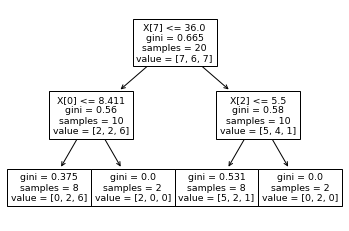

In [9]:
# use a default tree
tree= DecisionTreeClassifier(max_depth = 2)

# build a decision tree classifier from the training set 
tree.fit(X_Train, Y_Train)

plot_tree(tree)

# Question 3
I computed the accuracy of my approach for different number of neighbors, ranging from 1 to 5, the accuracy is 0.2 for both 1 to 5 neighbors. So I further add neighbors to 10 and found that the accuracy is 0.4 when the number of neighbors ranging from 6 to 10. More neighbors can reduce variance but increase bias. So increase the number of neighbors won't increase the accuracy all the time.

In [10]:
# function to calculate the Euclidean distance
def EuclideanD(x1, x2):
  return (np.sum((x1-x2)**2, 1))**(1/2)

In [11]:
# Function to find Majority element in an array
def majorityVote(arr):

  arr = np.sort(arr)
  maxCount = 1
  candidate = arr[0]  # sentinels

  for ele in arr:
    count = np.count_nonzero(arr==ele)
    if count > maxCount:
      maxCount = count
      candidate = ele
  
  return candidate


In [12]:
#KNN classifier 

kneighbour = [1,2,3,4,5,6,7,8,9,10]

#store the accuracy of each K value
accuracy = []

#start for loop
for k in kneighbour:
  y_pred =[]
  for X in X_Test:
    # calculate Euclidean distance between test example and all training samples
    euclid = EuclideanD(X, X_Train)
    #get the index of closest K neibours 
    index_train = np.argsort(euclid)
    choosenK = index_train[:k]
    #get the class of closest K neibours
    ypred_k = Y_Train[choosenK]

    y_pred.append(majorityVote(ypred_k))

  accuracy.append(accuracy_score(y_pred,Y_Test))


Text(0, 0.5, 'accuracy')

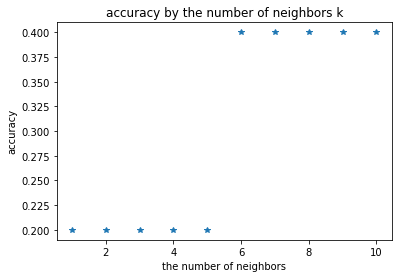

In [13]:
# plot accuracy with number of neighbourhood
import matplotlib.pyplot as plt

plt.plot(kneighbour, accuracy, "*")
plt.title("accuracy by the number of neighbors k")
plt.xlabel("the number of neighbors")
plt.ylabel("accuracy")

